<a href="https://colab.research.google.com/github/muhzaafrils/PCVK_Genap_2021/blob/main/TugasAkhir_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils


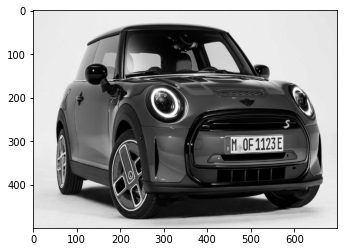

In [11]:
# Mengubah ukuran gambar kemudian convert ke grey scale

img = cv.imread('/content/drive/MyDrive/PCVK/kelompok/image4.jpg',cv.IMREAD_COLOR)
img = cv.resize(img, (700,500) )
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

plt.imshow(gray, cmap='gray')

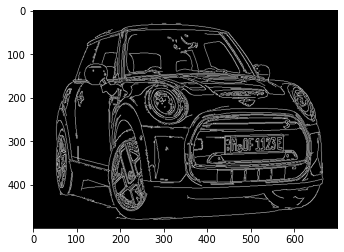

In [12]:
# Kemudian seluruh gambar kecuali tempat plat nomor dengan menggunakan metode canny edge dari OpenCV

edged = cv.Canny(gray, 30, 200) 
plt.imshow(edged, cmap='gray')

In [13]:
# Setelah itu disini gunakan contours pada gambar

contours=cv.findContours(edged.copy(),cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv.contourArea, reverse = True)[:10]
screenCnt = None


In [14]:
# Kemudian lakukan pengulangan semua hasil  yang memiliki kontur bentuk persegi panjang dengan empat sisi  

for c in contours:
    
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)


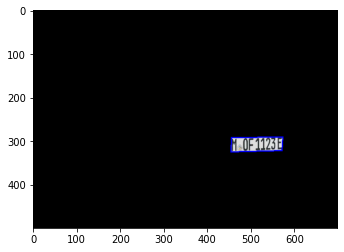

In [15]:
# Kemudian disini menutup seluruh gambar kecuali tempat plat nomornya. 

mask = np.zeros(gray.shape,np.uint8)
new_image = cv.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv.bitwise_and(img,img,mask=mask)
plt.imshow(new_image)

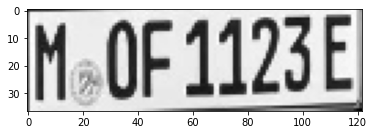

In [16]:
# Kemudian dilakukan pemotongan gambar(crop) dan mebuat hasil gambar baru

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.imshow(Cropped, cmap='gray')

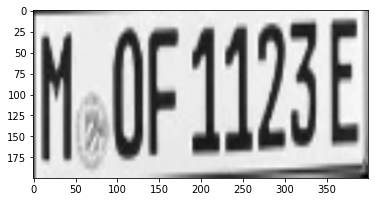

In [17]:
# Kemudian dilakukan pengubahan pada ukuran gambar

img = cv.resize(img,(500,300))
Cropped = cv.resize(Cropped,(400,200))
plt.imshow(img)
plt.imshow(Cropped, cmap='gray')